# Pistachio Species Classification using MLP Neural Network

This notebook implements a binary classification model using morphological features to distinguish between Kirmizi and Siirt pistachio species.


Doğruluk Oranı: 0.9093023255813953

Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       247
           1       0.89      0.90      0.89       183

    accuracy                           0.91       430
   macro avg       0.91      0.91      0.91       430
weighted avg       0.91      0.91      0.91       430



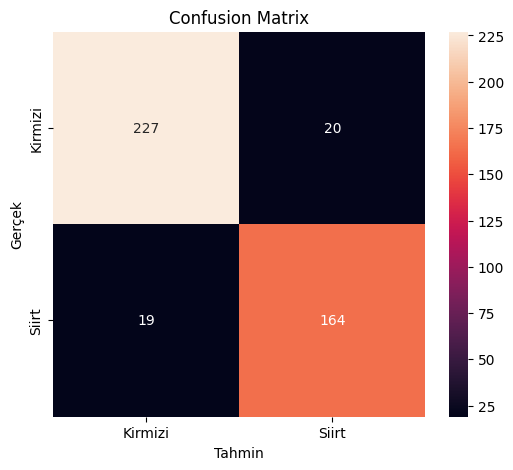

['veri_olcekleme_araci.pkl']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# Veri setini oku
veri = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")

# Eksik sınıfları temizle
veri = veri.dropna(subset=["Class"])
veri["Class"] = veri["Class"].str.strip()

# Etiketleri sayısal hale getir
veri["etiket"] = veri["Class"].map({
    "Kirmizi_Pistachio": 0,
    "Siirt_Pistachio": 1
})

veri = veri.dropna(subset=["etiket"])

# Giriş ve çıkış değişkenleri
X = veri.drop(["Class", "etiket"], axis=1)
y = veri["etiket"].astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Tahmin
tahmin = mlp.predict(X_test_scaled)

print("Doğruluk Oranı:", mlp.score(X_test_scaled, y_test))
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, tahmin))

# Confusion Matrix
cm = confusion_matrix(y_test, tahmin)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Kirmizi", "Siirt"],
            yticklabels=["Kirmizi", "Siirt"])
plt.title("Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

# Model ve scaler kaydet
joblib.dump(mlp, "egitilmis_model.pkl")
joblib.dump(scaler, "veri_olcekleme_araci.pkl")
